In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
dataframe = pd.read_csv(r"indicadoresCLASE.csv")
dataframe

,SUB,SUBM,AT,VERB,VERBM,OBJ,IOBJ,TIME,MANNER,CAUSE,...,SUBJECT,MATTER,CONCESSION,QUANTITY,OWNERCHIP,DOUBT,AC,RC,PC,CLASS
0,2.944439,3.637586,0.0,2.159484,3.637586,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,entailment
1,3.637586,0.000000,0.0,2.538974,0.000000,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,contradiction
2,2.028148,0.000000,0.0,2.564949,0.000000,1.845827,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,contradiction
3,3.637586,0.000000,0.0,2.251292,0.000000,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,neutral
4,2.028148,0.000000,0.0,2.564949,0.000000,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2.538974,1.558145,0.0,3.637586,0.000000,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,entailment
90,3.637586,0.000000,0.0,0.000000,0.000000,3.637586,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,entailment
91,2.251292,0.000000,0.0,1.871802,0.000000,1.648659,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,contradiction
92,3.637586,0.000000,0.0,2.564949,0.000000,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,contradiction


In [3]:
dataframe.describe()

,SUB,SUBM,AT,VERB,VERBM,OBJ,IOBJ,TIME,MANNER,CAUSE,...,INSTRUMENT,SUBJECT,MATTER,CONCESSION,QUANTITY,OWNERCHIP,DOUBT,AC,RC,PC
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.0,94.0,...,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.0,94.000000
mean,3.068390,0.485599,0.084681,2.229965,0.140648,0.674890,0.017997,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237351
std,0.856753,1.067728,0.451974,0.948197,0.513251,1.148909,0.174483,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.864077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,2.538974,0.000000,0.000000,1.871802,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,3.637586,0.000000,0.000000,2.159484,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,3.637586,0.000000,0.000000,2.564949,0.000000,1.414021,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,3.637586,3.637586,3.637586,3.637586,3.637586,3.637586,1.691676,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.637586


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       41
neutral          26
dtype: int64


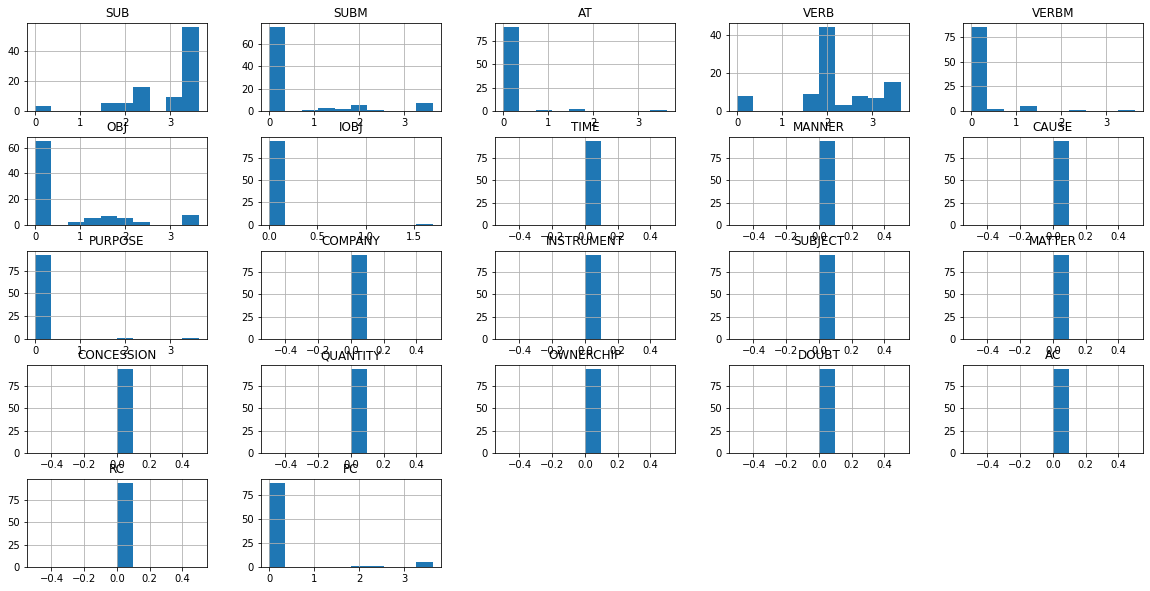

In [5]:
dataframe.hist(figsize=(20,10))
plt.show()

/home/david/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


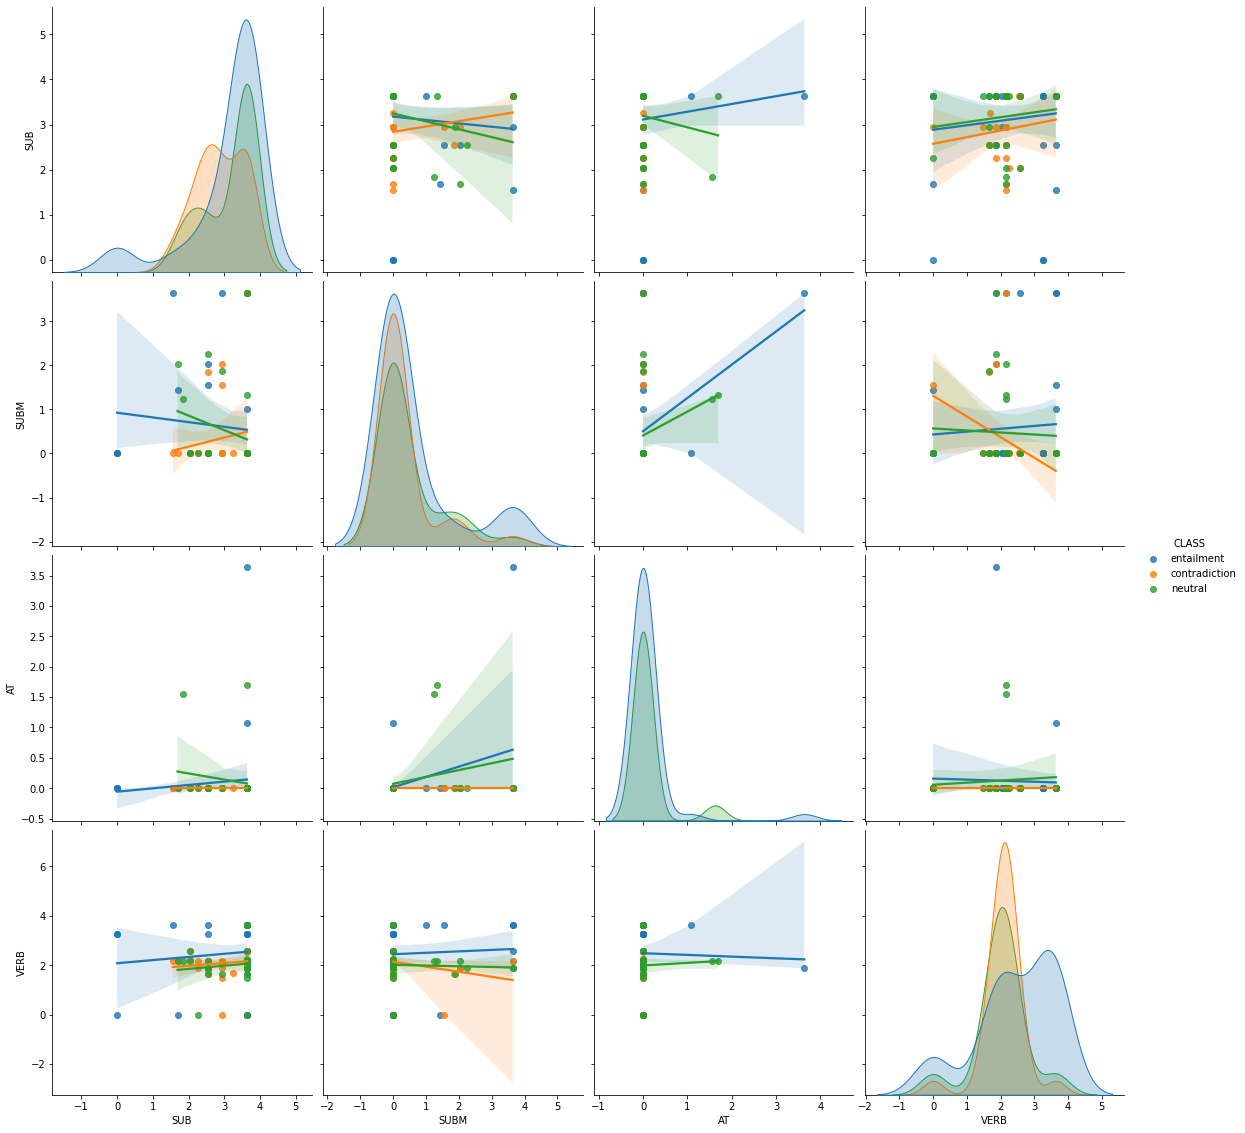

In [6]:
sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=["SUB", "SUBM","AT","VERB"],kind='reg')

In [7]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_205793/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_205793/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(94, 22)

In [8]:
y_test

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [9]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [10]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [11]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
model.decision_function(X)

array([[-1.05636514,  0.61993498,  0.43643016],
       [-0.20499568,  0.35355426, -0.14855858],
       [ 0.10781129,  0.32685397, -0.43466526],
       [-0.18140876,  0.27839809, -0.09698933],
       [ 0.04210611,  0.27153099, -0.31363711],
       [-0.29507039,  0.64056377, -0.34549338],
       [-0.19345625,  0.56604232, -0.37258608],
       [-0.1738815 ,  0.25441361, -0.08053211],
       [-0.1738815 ,  0.25441361, -0.08053211],
       [ 0.10650001,  0.23324043, -0.33974045],
       [-0.29507039,  0.64056377, -0.34549338],
       [ 0.0976425 ,  0.09575547, -0.19339797],
       [-0.00969567,  0.13400355, -0.12430788],
       [ 0.13556795,  0.21630711, -0.35187505],
       [-0.13447047,  0.65044858, -0.51597811],
       [-0.1738815 ,  0.25441361, -0.08053211],
       [ 0.07278311, -0.15092762,  0.07814451],
       [-0.20849154,  0.58812372, -0.37963217],
       [-0.04439576,  0.36343907, -0.31904331],
       [-0.16311332,  0.22010244, -0.05698911],
       [-0.1738815 ,  0.25441361, -0.080

In [13]:
labels=np.array(['SUB', 'SUBM', 'AT', 'VERB', 'VERBM', 'OBJ', 'IOBJ',
       'TIME', 'MANNER', 'CAUSE', 'PURPOSE', 'COMPANY', 'INSTRUMENT',
       'SUBJECT', 'MATTER', 'CONCESSION', 'QUANTITY', 'OWNERCHIP', 'DOUBT',
       'AC', 'RC', 'PC'])

In [14]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [15]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [16]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  6 IOBJ 4 VERBM
Entailment  3 VERB 10 PURPOSE
Neutral  10 PURPOSE 3 VERB


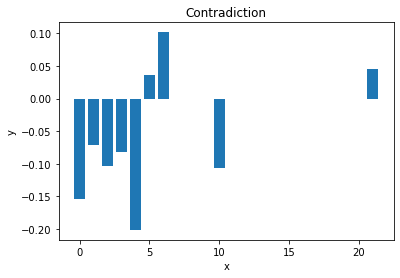

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,22,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

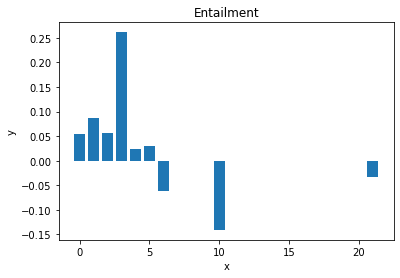

In [18]:
x_v = np.arange(0,22,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

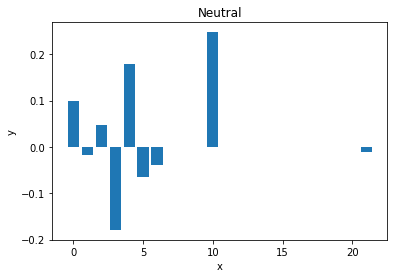

In [19]:
x_v = np.arange(0,22,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [20]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'contradiction' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'contradiction' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'contradiction' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'en

In [21]:
y

array(['entailment', 'contradiction', 'contradiction', 'neutral',
       'neutral', 'neutral', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'neutral', 'entailment', 'contradiction', 'contradiction',
       'entailment', 'entailment', 'entailment', 'neutral',
       'contradiction', 'entailment', 'neutral', 'entailment',
       'entailment', 'entailment', 'neutral', 'contradiction',
       'contradiction', 'entailment', 'contradiction', 'neutral',
       'entailment', 'neutral', 'neutral', 'entailment', 'neutral',
       'neutral', 'contradiction', 'entailment', 'neutral', 'neutral',
       'entailment', 'contradiction', 'neutral', 'entailment',
       'entailment', 'neutral', 'entailment', 'contradiction',
       'entailment', 'entailment', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'entailment', 'entailment', 'contradiction',
       'entailment', 'entailment', 'contradiction', 'entailment',
       'c

In [22]:
X

array([[2.94443898, 3.63758616, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.63758616, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.02814825, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.2512918 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.63758616, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.53897387, 1.84582669, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [23]:
model.score(X,y)

0.46808510638297873

In [53]:
validation_size = 0.05
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [54]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.326389 (0.136543)


In [55]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.4


In [27]:
print(confusion_matrix(Y_validation, predictions))

[[2 4 0]
 [1 1 0]
 [0 1 1]]


In [28]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.67      0.33      0.44         6
   entailment       0.17      0.50      0.25         2
      neutral       1.00      0.50      0.67         2

     accuracy                           0.40        10
    macro avg       0.61      0.44      0.45        10
 weighted avg       0.63      0.40      0.45        10



In [29]:
#X_new = pd.DataFrame()
#model.predict(X_new)

# Valores ShapLey

In [30]:
import sklearn
import shap
shap.initjs()

In [31]:
li=dataframe.columns
li=li.to_list()

In [32]:
explainer = shap.Explainer(
    model, X_train
)
shap_values = explainer(X_test)

In [33]:
shap_values

.values =
array([[[ 0.0153077 , -0.00545463, -0.00985307],
        [-0.22067666,  0.27358524, -0.05290858],
        [ 0.00986679, -0.00539167, -0.00447512],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00807925,  0.00592514,  0.00215412]],

       [[-0.09203047,  0.03279345,  0.05923702],
        [ 0.03594752, -0.04456616,  0.00861864],
        [ 0.00986679, -0.00539167, -0.00447512],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00807925,  0.00592514,  0.00215412]],

       [[ 0.15720105, -0.05601584, -0.1011852 ],
        [ 0.03594752, -0.04456616,  0.00861864],
        [ 0.00986679, -0.00539167, -0.00447512],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00807925,  0.00592514,  0.00215412]],

       ...,

       [[ 0.12264587, -0.04370271, -0.07894316],
 

In [34]:
shap_values.shape

(94, 22, 3)

In [35]:
X_train.shape

(84, 22)

In [36]:
X_test.shape

(94, 22)

In [37]:
shap_values

.values =
array([[[ 0.0153077 , -0.00545463, -0.00985307],
        [-0.22067666,  0.27358524, -0.05290858],
        [ 0.00986679, -0.00539167, -0.00447512],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00807925,  0.00592514,  0.00215412]],

       [[-0.09203047,  0.03279345,  0.05923702],
        [ 0.03594752, -0.04456616,  0.00861864],
        [ 0.00986679, -0.00539167, -0.00447512],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00807925,  0.00592514,  0.00215412]],

       [[ 0.15720105, -0.05601584, -0.1011852 ],
        [ 0.03594752, -0.04456616,  0.00861864],
        [ 0.00986679, -0.00539167, -0.00447512],
        ...,
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [-0.00807925,  0.00592514,  0.00215412]],

       ...,

       [[ 0.12264587, -0.04370271, -0.07894316],
 

TypeError: only integer scalar arrays can be converted to a scalar index

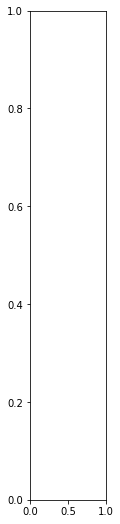

In [38]:
shap.summary_plot(shap_values,X_train,max_display=10)

In [ ]:
shap.plots.waterfall(shap_values.values)

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.